# Logistic Regression

En esta notebook vamos a analizar el caso propuesto en la página 146 del Hands-On

La Regresión logística es comunmente utilizada ára estimar la probabilidad a posteriori de que una instancia pertenezca a una clase en particular

## Estimando probabilidades

Funciona de la misma manera de un modelo de regresión lineal. La Regresión logística calcula la suma pesada de las características de entrada, más el termino de regularización, y como _output_ contiene el resultado de aplicar la función logística.

$$ \hat{p} = h_{\theta}(x)=\sigma (x^{T} \theta)$$

Donde la función sigmoide está definida de la siguiente manera
$$\sigma (t) = \frac{1}{1+ \mathrm{e}^{-t}}$$

Una vez que el modelo de regresión logística estimó la probabilidad de $\hat{p}$

In [147]:
import os
from sklearn import datasets
import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
StratifiedKFold, GroupShuffleSplit,
GroupKFold, StratifiedShuffleSplit,cross_val_score, LeaveOneOut)
from sklearn.linear_model import (LogisticRegression,LogisticRegressionCV)
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.metrics import (plot_confusion_matrix, classification_report)
import seaborn as sns

# Donde guardar las figuras
IMAGES_PATH = "figures"
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

matplotlib.rcParams.update({'font.size': 22})
plt.rc('xtick', labelsize=15)

In [103]:
iris = datasets.load_iris()
list(iris.keys())
['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [104]:
unique, counts = np.unique(iris["target"], return_counts=True)
dict(zip(unique, counts))

{0: 50, 1: 50, 2: 50}

Transformamos el dataset Iris a un dataframe para facilitar su manipulación

In [105]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris['data'], columns=features)
iris_df['species'] = iris["target"]
iris_df['species'] = iris_df['species'].map({0: "setosa", 1: "versicolor", 2: "virginica"})
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

Saving figure attributes_vioplots


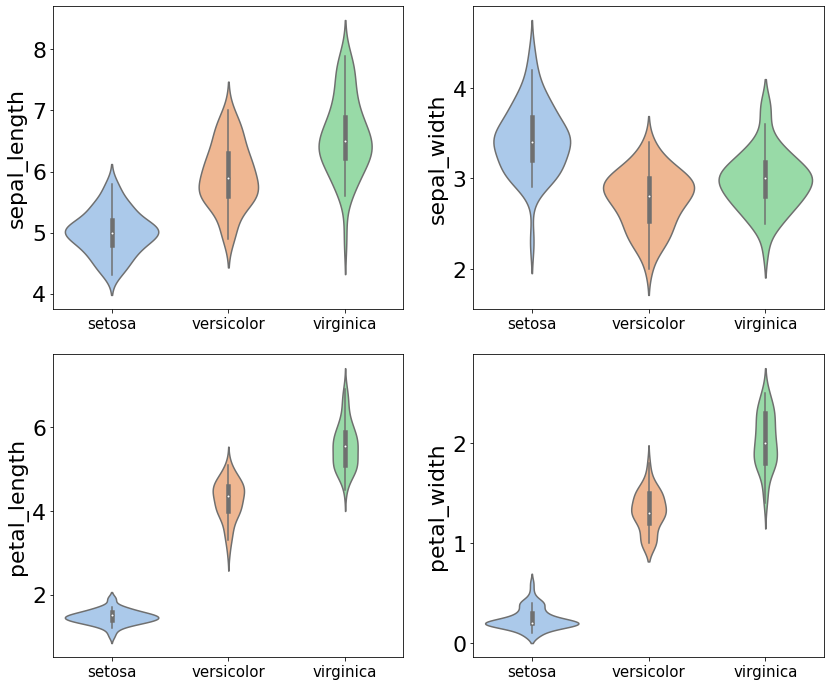

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
axes = axes.flatten()
for i in range(4):
    sns.violinplot(x='species',y=features[i], data=iris_df, palette='pastel',ax=axes[i])
    axes[i].set_xlabel('')
save_fig('attributes_vioplots')

## [**Regresion logística**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [107]:
#Modelo de regresion logística entrenado sobre uno de los atributos (petal width en este caso)
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int64) # 1 if Iris virginica, else 0
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

## Fronteras de decisión establecidas por el modelo

A continuación presentamos un gráfico que incluye las fronteras de decision establecida por las densidades probabilisticas

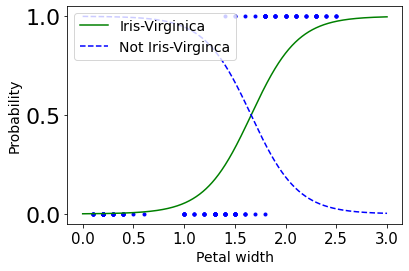

Saving figure frontera


<Figure size 432x288 with 0 Axes>

In [108]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()
save_fig('frontera')

In [16]:
log_reg.predict_proba([[1.7], [1.5]]) #-> te da las medidas de probabilidad acordes a cada clase

array([[0.45722097, 0.54277903],
       [0.66709636, 0.33290364]])

### Exploración de los datos


In [119]:
import plotly
import plotly.express as px

fig = px.scatter_3d(iris_df[["sepal_length","sepal_width","petal_length","petal_width","species"]],
                    x = 'petal_length',
                    y = 'petal_width',
                    z = 'sepal_length',
                    size = 'sepal_width',
                    color = 'species',
                    opacity = 0.7)

fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))

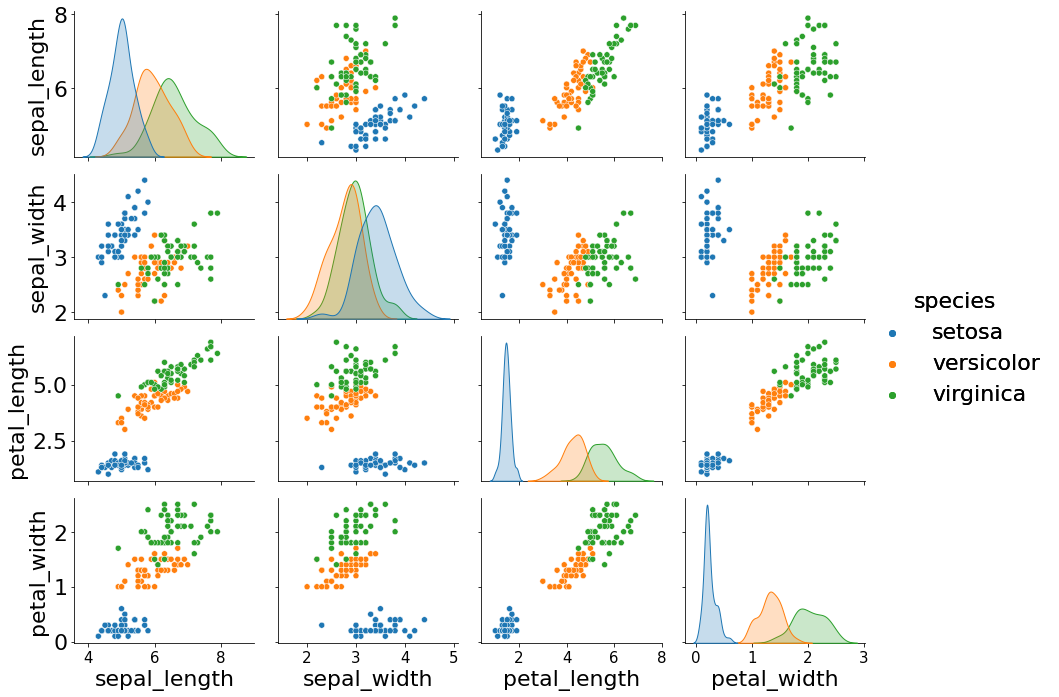

In [120]:
sns.pairplot(iris_df[["sepal_length","sepal_width","petal_length","petal_width","species"]], hue = "species") \
.add_legend();

In [ ]:
def generacionDeFloresLocas(df):
    #esto debería recibir el iris_df y transformarlo agregandole las flores locas, devolviendo otro dataframe sin modificar el original
    #luego de implementar esta función correr las celdas siguientes para ver como quedaron los datos
        return df
    
crazyFlowers_df = generacionDeFloresLocas(iris_df);

In [ ]:
import plotly
import plotly.express as px

fig = px.scatter_3d(crazyFlowers_df[["sepal_length","sepal_width","petal_length","petal_width","species"]],
                    x = 'petal_length',
                    y = 'petal_width',
                    z = 'sepal_length',
                    size = 'sepal_width',
                    color = 'species',
                    opacity = 0.7)

fig.update_layout(margin = dict(l=0, r=0, b=0, t=0))

In [ ]:
sns.pairplot(crazyFlowers_df[["sepal_length","sepal_width","petal_length","petal_width","species"]], hue = "species") \
.add_legend();

# Regresión logística multiclases con las 4 variables

A continuación vamos a utilizar Softmax regression para realizar la predicción considerando cada tipo de planta

## Dividimos el dataset en train y test de forma estratificada
Dividimos el dataset en _train_ y _test_ de forma estratificada sobre los tipos de plantas y luego entrenamos el modelo utilizando cross validation

In [72]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(iris_df, iris_df["species"]):
    strat_train_set = iris_df.loc[train_index].reset_index(drop=True)
    strat_test_set = iris_df.loc[test_index].reset_index(drop=True)

In [73]:
train = strat_train_set.drop("species", axis=1).copy()
train_labels = strat_train_set["species"]
test = strat_test_set.drop("species", axis=1).copy()
test_labels = strat_test_set["species"]

strat_train_set['species'].value_counts()

virginica     40
setosa        40
versicolor    40
Name: species, dtype: int64

In [66]:
test = strat_test_set.drop("species", axis=1).copy()
test_labels = strat_test_set["species"]

strat_test_set['species'].value_counts()

virginica     10
setosa        10
versicolor    10
Name: species, dtype: int64

## Búsqueda de hiperparámetros y entrenamiento

A continuación vamos a realizar la búsqueda exhaustiva de hiperparámetros utilizando GridsearchCV

In [191]:
def selectValuesForHyperparameter(initialValue, lastValue, jumps):
    rv = []
    for v in range(int(initialValue*100), int(lastValue*100),int(jumps*100)):
        rv.append(float(v/100));
    return rv 

def generarGridSearchParal1yl2(cv, cValues):
    params = {'C':cValues, 'solver':['liblinear','saga']}
    softmax_reg_l1 = LogisticRegression(penalty='l1',  max_iter=6000)
    clf_reg_l1 = GridSearchCV(softmax_reg_l1, params, cv=cv,
                                    scoring='neg_log_loss', #-> este scoring lo sacamos del Hands' On 
                                    refit=True,         
                                    return_train_score=True)
   
    params = {'C':cValues, 'solver':['newton-cg', 'lbfgs','sag']}
    softmax_reg = LogisticRegression(multi_class="multinomial", max_iter=6000)
    clf_reg = GridSearchCV(softmax_reg, params, cv=cv,
                                    scoring='neg_log_loss', #-> este scoring lo sacamos del Hands' On 
                                    refit=True,
                                    return_train_score=True)
    return clf_reg_l1, clf_reg
    

def generadorDeModelos(partitions, data_train, data_target):
    cValues = selectValuesForHyperparameter(1.0, 51,0.1)
    l1Values = selectValuesForHyperparameter(0, 1.1, 0.1); 
    
    clf_reg_l1,clf_reg  = generarGridSearchParal1yl2(partitions, cValues)
    rv = {}
        
    print("Logistic con penalidad l1 =======================================================================\n")
    clf_reg_l1.fit(data_train, data_target)
    print("Los mejores parametros encontrados para softmax reg con l1 son:"+str(clf_reg_l1.best_params_)+'\n')
    rv['softmax_reg_l1'] = clf_reg_l1.best_estimator_  
    
    print("Softmax con penalidad l2 =======================================================================\n")
    clf_reg.fit(data_train, data_target)
    print("Los mejores parametros encontrados para softmax reg son:"+str(clf_reg.best_params_)+'\n')
    rv['softmax_reg_l2'] = clf_reg.best_estimator_ 
    
    print("Softmax con penalidad ElasticNet ===============================================================\n")
    #Este va a ser un modelo que usa penalidad elasticnet y aprovecha el refit para encontrar los mejores parametros
    rv['softmax_reg_elastic'] =LogisticRegressionCV(cv=partitions,Cs=cValues,solver='saga',
                                                        random_state=0,
                                                        penalty='elasticnet',
                                                        scoring='neg_log_loss',
                                                        max_iter=6000,
                                                        l1_ratios=l1Values,
                                                        multi_class='multinomial',
                                                        refit=True).fit(data_train, data_target)

    print("el mejor hiperparametro encontrado para C es:"+str(rv['softmax_reg_elastic'].C_)+'\n')
    print("el mejor hiperparametro encontrado para l1 ratio es:"+str(rv['softmax_reg_elastic'].l1_ratio_)+'\n')
    
    print("Logistic con penalidad l1 removiendo sepal width ================================================"+'\n')
    
    train_withoutSepalWidth = data_train.drop("sepal_width",axis=1).copy()
    #Entrenamos el modelo con los hiperparametros encontrados con GridsearchCV sin usar el atributo sepal width y utilizamos la penalidad regularización l1
    clf_reg_l1.fit(train_withoutSepalWidth, data_target)
    print("Los mejores parametros encontrados son:"+str(clf_reg_l1.best_params_)+'\n')
    rv['reg_l1_withoutSepalWidth'] = clf_reg_l1.best_estimator_ 
    
    print("Softmax con penalidad l2 removiendo sepal width =================================================\n")
    #Entrenamos el modelo con los hiperparametros encontrados con GridsearchCV sin usar el atributo sepal width y utilizando la penalidad de regularización l2
    clf_reg.fit(train_withoutSepalWidth, data_target)
    print("Los mejores parametros encontrados son:"+str(clf_reg.best_params_)+'\n')
    rv['reg_l2_withoutSepalWidth'] = clf_reg.best_estimator_ 
    
    print("Softmax con penalidad ElasticNet removiendo sepal width =========================================\n")
    rv['reg_elastic_withoutSepalWidth'] = LogisticRegressionCV(cv=partitions,Cs=cValues,solver='saga',
                                                        random_state=0,
                                                        penalty='elasticnet',
                                                        scoring='neg_log_loss',
                                                        max_iter=6000,
                                                        l1_ratios=l1Values,
                                                        multi_class='multinomial',
                                                        refit=True).fit(train_withoutSepalWidth, data_target);

    print("el mejor hiperparametro encontrado para C es:"+str(rv['reg_elastic_withoutSepalWidth'].C_)+'\n')
    print("el mejor hiperparametro encontrado para l1 ratio es:"+str(rv['reg_elastic_withoutSepalWidth'].l1_ratio_)+'\n')
    return rv

def generarResultados(data, initialPercentage, finalPercentaje, finalFolds):
    rv = {}
    for test_percentage in range(int(initialPercentage*10), int(finalPercentaje*10)+1): # acá seleccionamos de que manera vamos a variar el porcentaje de test
        split = StratifiedShuffleSplit(n_splits=1, test_size=float(test_percentage/10), random_state=42)
        
        for train_index, test_index in split.split(data, data["species"]):
            strat_train_set = data.loc[train_index].reset_index(drop=True)
            strat_test_set = data.loc[test_index].reset_index(drop= True)

        train = strat_train_set.drop("species", axis=1).copy()
        train_labels = strat_train_set["species"]
        test = strat_test_set.drop("species", axis=1).copy()
        test_labels = strat_test_set["species"]
        
        models = []
        for cv in range(2,finalFolds+1): # acá seleccionamos el numero de folds con el que vamos a generar los modelos
            print("===== Generando modelos con "+str(cv)+" folds ======\n")
            models.append(generadorDeModelos(cv, train, train_labels))
        rv[str(float(test_percentage/10))] = models 
        mostrarResultadosYEvaluar(models, float(test_percentage/10), test, test_labels)
    
    return rv

def mostrarResultadosYEvaluar(results, testPercentage, test, test_labels):
    x_test_withoutSepalWidth = test.drop("sepal_width",axis=1).copy()
    numberOfFolds = 2
    print("============== Resultados tomando "+str(testPercentage)+" de test ==============\n")
    for models in results:
        print("============== Resultados tomando "+str(numberOfFolds)+" folds ==============\n")
        numberOfFolds=numberOfFolds+2
        for name, model in models.items():
            print("============== Reporte de clasificación para el modelo: "+name+" ==============\n")
            if("withoutSepalWidth" in name):
                print(classification_report(test_labels, model.predict(x_test_withoutSepalWidth), target_names=["setosa", "versicolor","virginica"])+'\n')
                plot_confusion_matrix(model, x_test_withoutSepalWidth, test_labels)
            else:
                print(classification_report(test_labels, model.predict(test), target_names=["setosa", "versicolor","virginica"])+'\n')
                plot_confusion_matrix(model, test, test_labels)
            save_fig("confusionMatrix_test"+str(testPercentage)+"_cv"+str(numberOfFolds)+"_model_"+name)

    

### Experimentación

La función generar resultados genera los 6 tipos de modelos variando el cross validation desde 2 hasta maxNumberOfFolds y a su vez repite este proceso variando el porcentaje del data set que tomamos para testear partiendo desde initialPercentageOfTest avanzando de a 10% hasta finalPercentageOfTest.

La idea sería correr esta función tanto para el dataset iris_df como para crazyFlowers_df, para hacer esto ultimo hay que completar la función que se encuentra en la parte de exploración de datos

===== Generando modelos con 2 folds ======

Logistic con penalidad l1 =======================================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 8.5, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 29.6, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[22.6 22.6 22.6]

el mejor hiperparametro encontrado para l1 ratio es:[0.7 0.7 0.7]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 10.5, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 21.4, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[18.6 18.6

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 2.7, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 10.3, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[4.8 4.8 4.8]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 2.1, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 13.8, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[10.5 10.5 10

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 9.3, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 19.6, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[25.8 25.8 25.8]

el mejor hiperparametro encontrado para l1 ratio es:[0.6 0.6 0.6]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.5, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 20.8, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[50

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 8.7, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 17.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[31.6 31.6 31.6]

el mejor hiperparametro encontrado para l1 ratio es:[0.1 0.1 0.1]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 7.9, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 14.4, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[27.3 27.3 

============== Reporte de clasificación para el modelo: reg_elastic_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Saving figure confusionMatrix_test0.2_cv6_model_reg_elastic_withoutSepalWidth
============== Resultados tomando 6 folds ==============

============== Reporte de clasificación para el modelo: softmax_reg_l1 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.

/home/bruno/.local/lib/python3.8/site-packages/sklearn/metrics/_plot/confusion_matrix.py:114: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



============== Reporte de clasificación para el modelo: reg_l1_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Saving figure confusionMatrix_test0.2_cv10_model_reg_l1_withoutSepalWidth
============== Reporte de clasificación para el modelo: reg_l2_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00 

============== Resultados tomando 14 folds ==============

============== Reporte de clasificación para el modelo: softmax_reg_l1 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Saving figure confusionMatrix_test0.2_cv16_model_softmax_reg_l1
============== Reporte de clasificación para el modelo: softmax_reg_l2 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00      

============== Reporte de clasificación para el modelo: reg_l1_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Saving figure confusionMatrix_test0.2_cv20_model_reg_l1_withoutSepalWidth
============== Reporte de clasificación para el modelo: reg_l2_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00 

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 23.9, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 6.9, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 19.5, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[23.3 23.

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 22.3, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 6.3, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 16.5, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[19.7 19.

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 19.3, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 6.8, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 16.0, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[16.2 16.2 16

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 20.3, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 6.6, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 17.0, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[20.4 20.4 20

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 24.1, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 7.0, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 16.6, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[19.6 19.

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 26.5, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 6.9, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 16.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[20.2 20.2 20

============== Reporte de clasificación para el modelo: reg_elastic_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Saving figure confusionMatrix_test0.3_cv6_model_reg_elastic_withoutSepalWidth
============== Resultados tomando 6 folds ==============

============== Reporte de clasificación para el modelo: softmax_reg_l1 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.

============== Reporte de clasificación para el modelo: softmax_reg_elastic ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Saving figure confusionMatrix_test0.3_cv12_model_softmax_reg_elastic
============== Reporte de clasificación para el modelo: reg_l1_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98 

============== Reporte de clasificación para el modelo: reg_elastic_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Saving figure confusionMatrix_test0.3_cv16_model_reg_elastic_withoutSepalWidth
============== Resultados tomando 16 folds ==============

============== Reporte de clasificación para el modelo: softmax_reg_l1 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 6.9, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 39.3, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[14.5 14.5 14.5]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 7.4, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 30.8, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[11.4 11.4

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 10.4, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[49.6 49.6 49.6]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 9.6, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 37.5, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[33. 33. 

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 6.3, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 13.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[12.4 12.4 12.4]

el mejor hiperparametro encontrado para l1 ratio es:[0.6 0.6 0.6]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 2.4, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 9.6, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[9.7 9.7

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 5.6, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 12.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[11.4 11.4 11.4]

el mejor hiperparametro encontrado para l1 ratio es:[0.6 0.6 0.6]

Logistic con penalidad l1 removiendo sepal width ================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados son:{'C': 2.2, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 9.8, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[9.1 9.1 9.1]

el mejor hiperparametro encontrado para l1 ratio es:[0.5 0.5 0.5]

===== Generando modelos con 6 folds ======

Logistic con penalidad l1 =======================================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 10.0, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 33.1, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[44.2 44.2 44.2]

el mejor hiperparametro encontrado para l1 ratio es:[0.7 0.7 0.7]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.5, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 12.3, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[14. 1

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 11.0, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 42.4, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[28.5 28.5 28.5]

el mejor hiperparametro encontrado para l1 ratio es:[0.7 0.7 0.7]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.3, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 11.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[12.2 12.2

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 9.6, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[0.9 0.9 0.9]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.3, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 12.7, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[12.6 1

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 9.6, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.8, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[0.9 0.9 0.9]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.5, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 12.7, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[12.8 1

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados para softmax reg con l1 son:{'C': 9.8, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 49.8, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[35.1 35.1 35.1]

el mejor hiperparametro encontrado para l1 ratio es:[0.7 0.7 0.7]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.5, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 12.4, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[11.9 1

============== Reporte de clasificación para el modelo: softmax_reg_l2 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.85      0.92        20

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60


Saving figure confusionMatrix_test0.4_cv8_model_softmax_reg_l2
============== Reporte de clasificación para el modelo: softmax_reg_elastic ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98       

============== Reporte de clasificación para el modelo: reg_l2_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60


Saving figure confusionMatrix_test0.4_cv12_model_reg_l2_withoutSepalWidth
============== Reporte de clasificación para el modelo: reg_elastic_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.95      1.00      0.98        20
   virginica       1.00      0.95      0.97        20

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       

============== Reporte de clasificación para el modelo: softmax_reg_l2 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.87      1.00      0.93        20
   virginica       1.00      0.85      0.92        20

    accuracy                           0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60


Saving figure confusionMatrix_test0.4_cv18_model_softmax_reg_l2
============== Reporte de clasificación para el modelo: softmax_reg_elastic ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.90      0.95        20

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97      

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 6.5, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 39.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[11.6 11.6 11.6]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.1, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[50.9 50.9

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 12.3, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 41.3, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 9.7, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[50.9 50.

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 10.7, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 9.1, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 42.3, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[33.7 33.7 33

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 6.0, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 29.1, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados son:{'C': 10.0, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 17.8, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[14.7 14.7 14.7]

el mejor hiperparametro encontrado para l1 ratio es:[0.8 0.8 0.8]

===== Generando modelos con 6 folds ======

Logistic con penalidad l1 =======================================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 10.6, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 9.4, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 50.6, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[50.9 50.

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 11.4, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 26.7, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[0.8 0.8 0.8]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 9.3, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 18.5, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[16.9 

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 10.4, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados son:{'C': 9.1, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

===== Generando modelos con 9 folds ======

Logistic con penalidad l1 =======================================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 9.7, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 50.9, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

Logistic con penalidad l1 removiendo sepal width ================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



Los mejores parametros encontrados son:{'C': 9.2, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 50.9, 'solver': 'newton-cg'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[1. 1. 1.]

===== Generando modelos con 10 folds ======

Logistic con penalidad l1 =======================================================================



/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/bruno/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

Los mejores parametros encontrados para softmax reg con l1 son:{'C': 10.0, 'solver': 'saga'}

Softmax con penalidad l2 =======================================================================

Los mejores parametros encontrados para softmax reg son:{'C': 39.3, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet ===============================================================

el mejor hiperparametro encontrado para C es:[50.9 50.9 50.9]

el mejor hiperparametro encontrado para l1 ratio es:[0.9 0.9 0.9]

Logistic con penalidad l1 removiendo sepal width ================================================

Los mejores parametros encontrados son:{'C': 8.4, 'solver': 'saga'}

Softmax con penalidad l2 removiendo sepal width =================================================

Los mejores parametros encontrados son:{'C': 15.0, 'solver': 'lbfgs'}

Softmax con penalidad ElasticNet removiendo sepal width =========================================

el mejor hiperparametro encontrado para C es:[12.6 12.6

============== Reporte de clasificación para el modelo: softmax_reg_l2 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.83      1.00      0.91        25
   virginica       1.00      0.80      0.89        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75


Saving figure confusionMatrix_test0.5_cv8_model_softmax_reg_l2
============== Reporte de clasificación para el modelo: softmax_reg_elastic ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.86      1.00      0.93        25
   virginica       1.00      0.84      0.91        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95       

============== Reporte de clasificación para el modelo: reg_l2_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.83      1.00      0.91        25
   virginica       1.00      0.80      0.89        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75


Saving figure confusionMatrix_test0.5_cv12_model_reg_l2_withoutSepalWidth
============== Reporte de clasificación para el modelo: reg_elastic_withoutSepalWidth ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      1.00      0.94        25
   virginica       1.00      0.88      0.94        25

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       

============== Reporte de clasificación para el modelo: softmax_reg_l2 ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.83      1.00      0.91        25
   virginica       1.00      0.80      0.89        25

    accuracy                           0.93        75
   macro avg       0.94      0.93      0.93        75
weighted avg       0.94      0.93      0.93        75


Saving figure confusionMatrix_test0.5_cv18_model_softmax_reg_l2
============== Reporte de clasificación para el modelo: softmax_reg_elastic ==============

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.86      1.00      0.93        25
   virginica       1.00      0.84      0.91        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95      

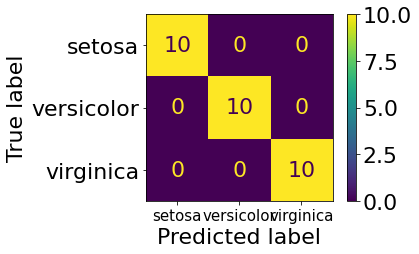

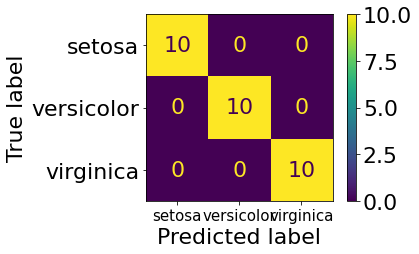

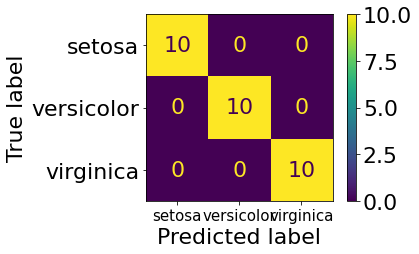

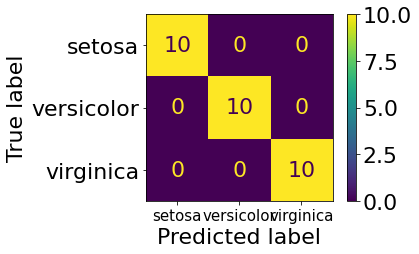

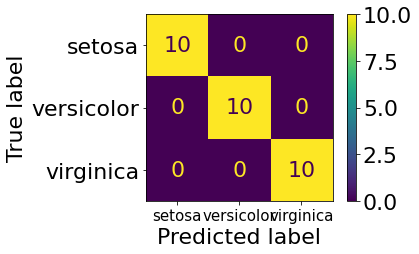

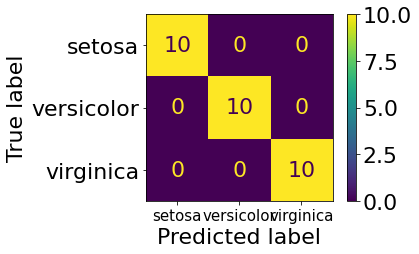

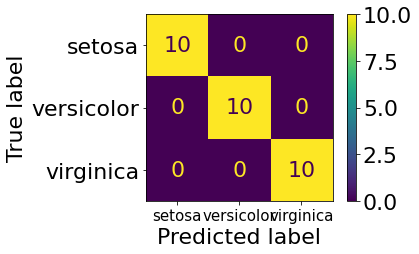

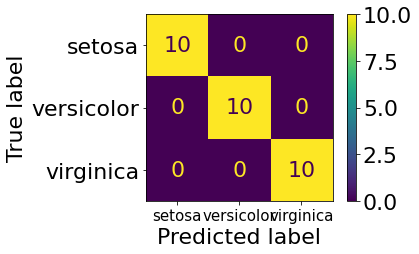

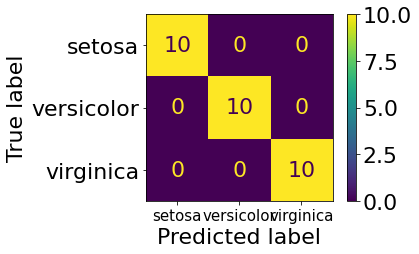

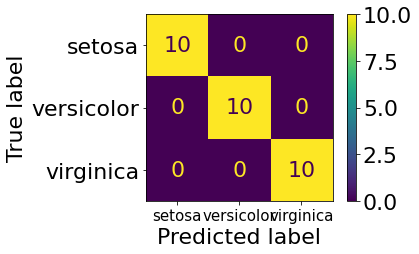

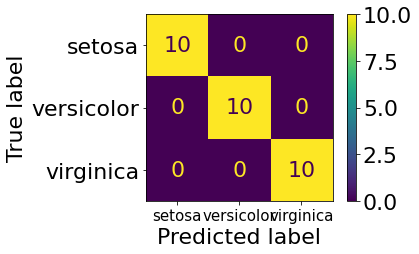

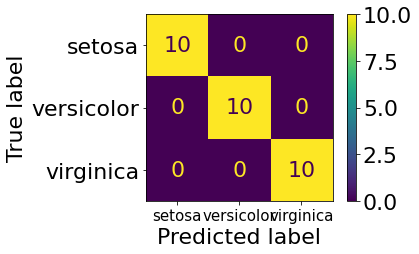

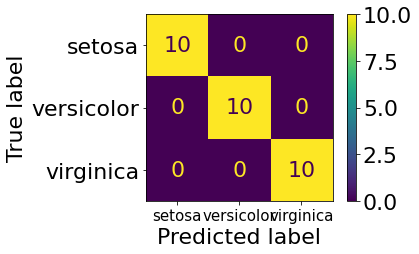

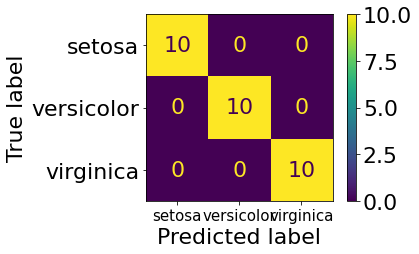

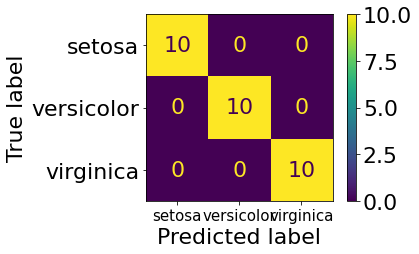

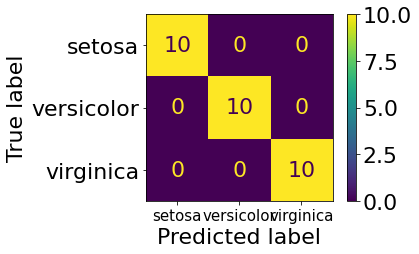

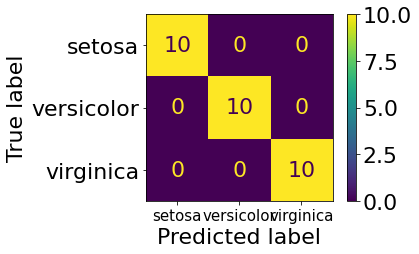

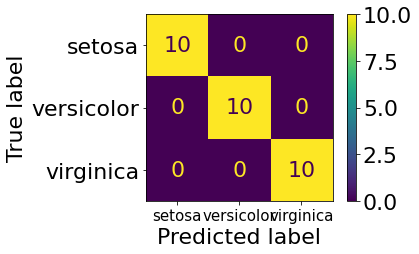

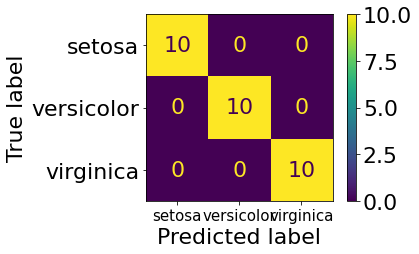

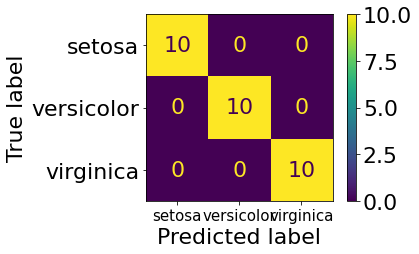

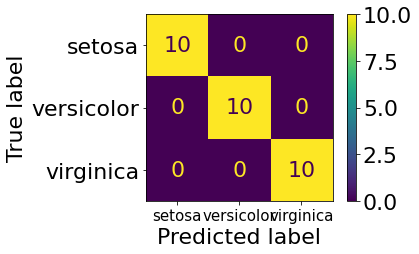

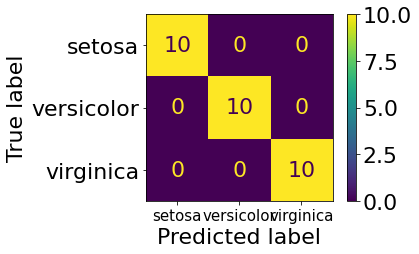

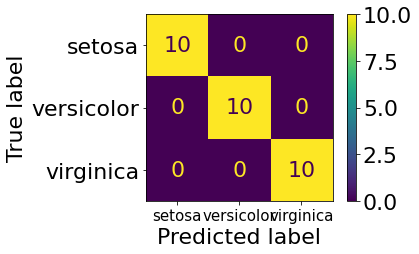

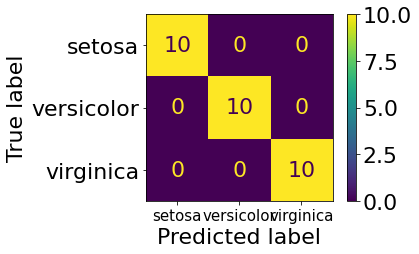

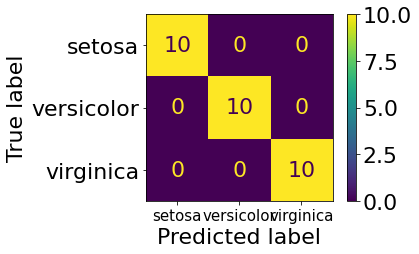

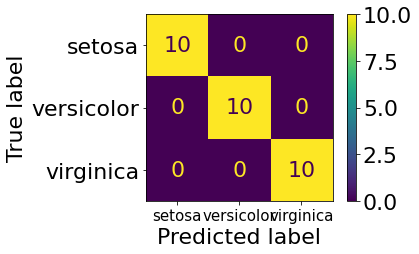

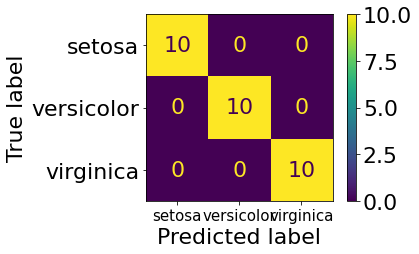

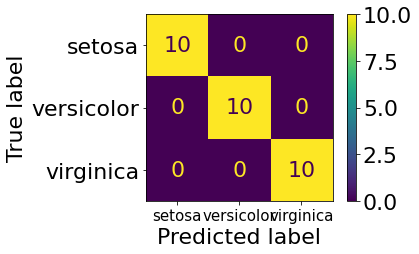

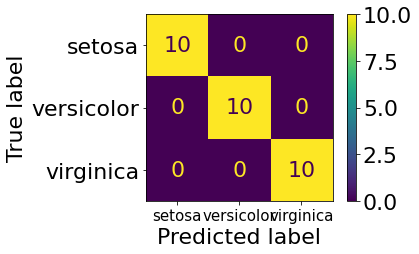

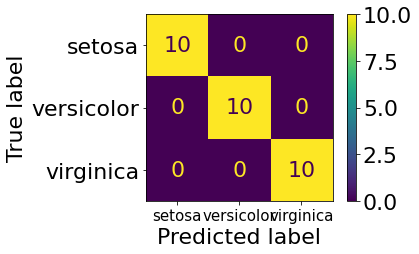

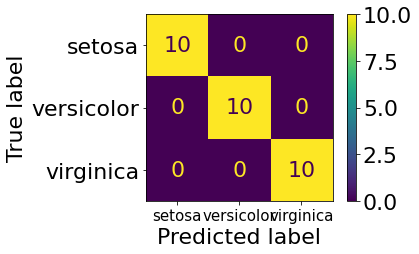

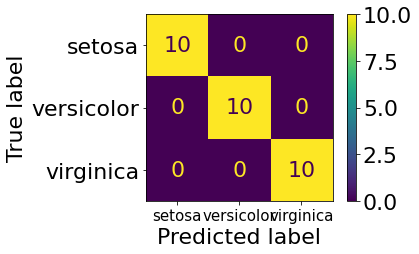

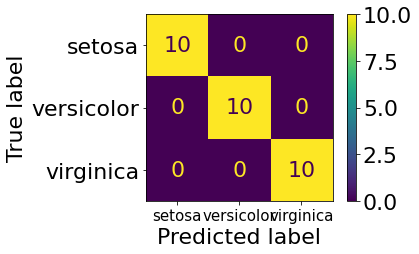

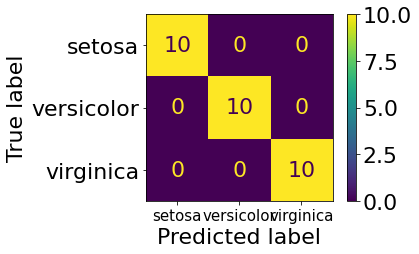

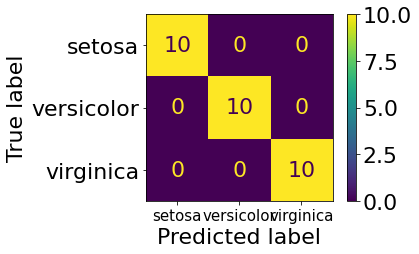

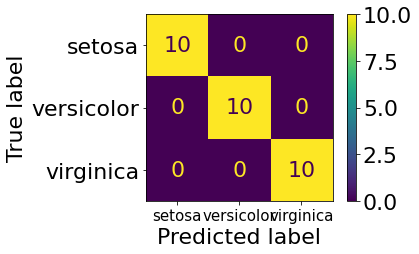

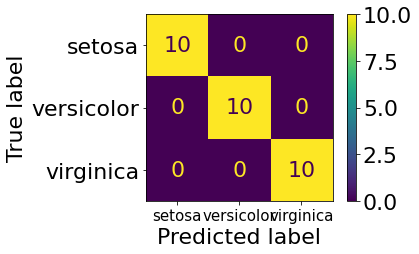

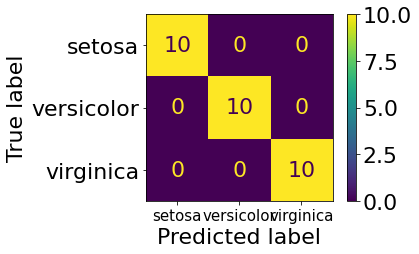

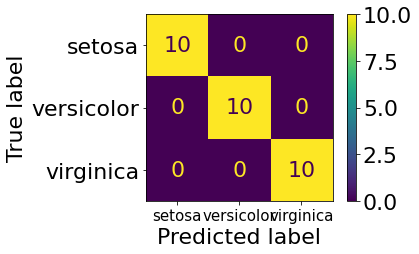

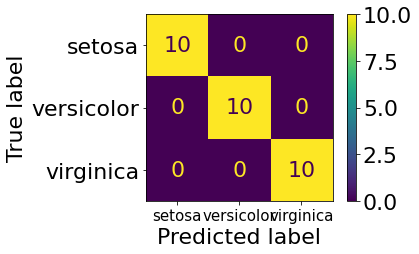

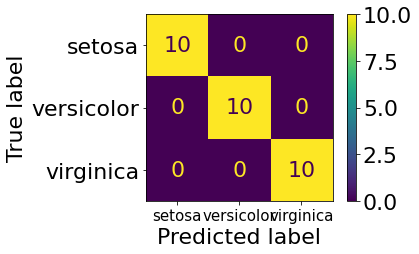

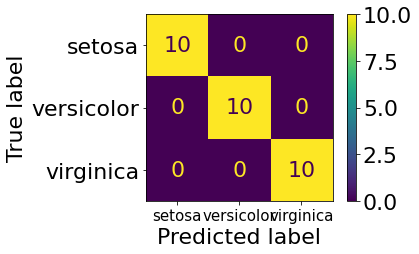

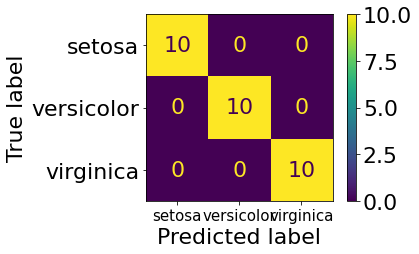

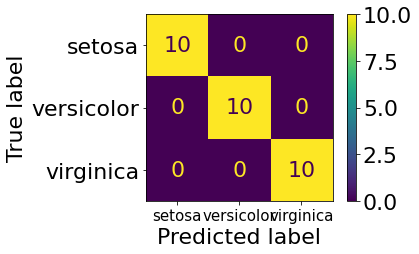

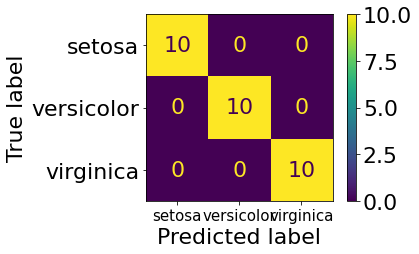

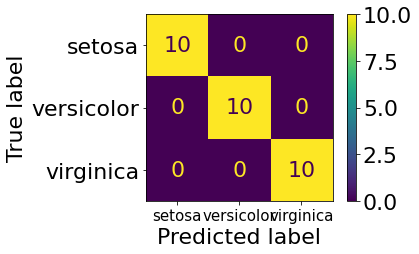

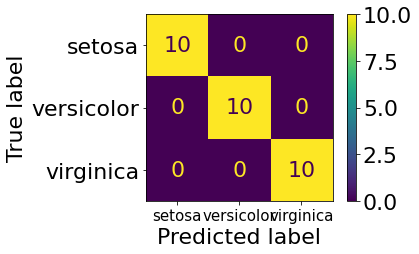

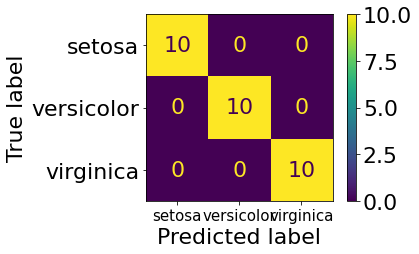

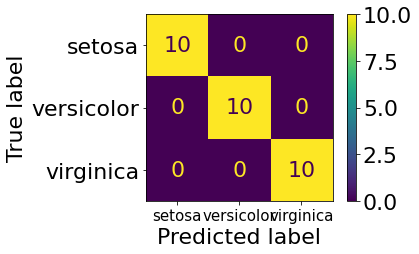

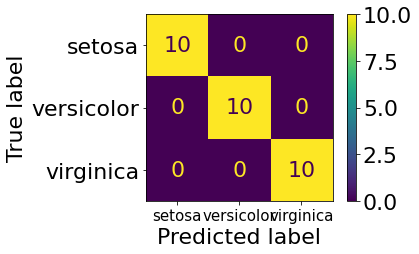

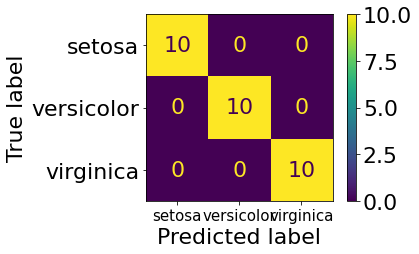

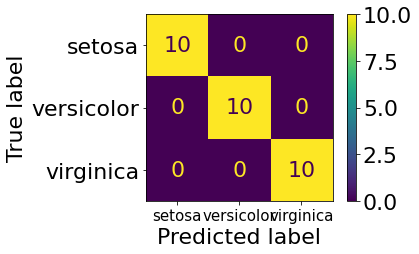

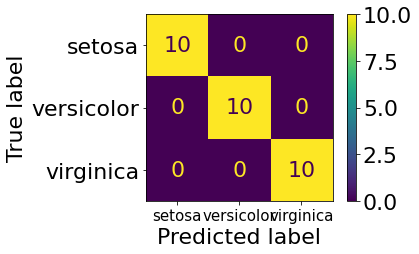

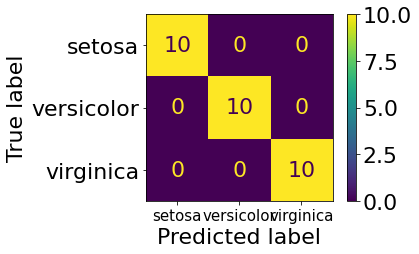

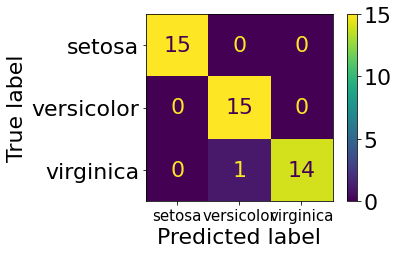

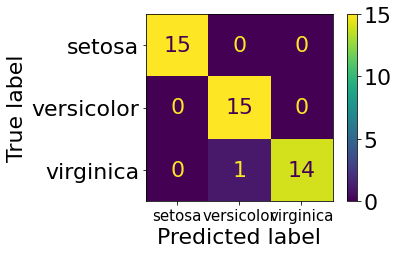

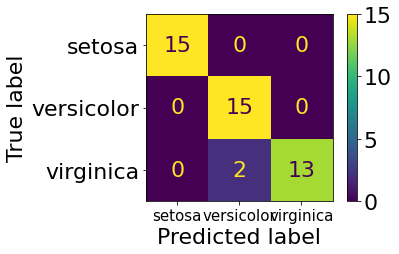

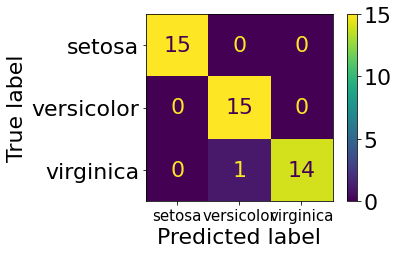

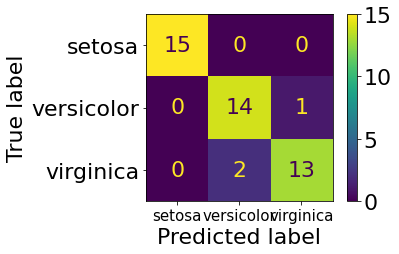

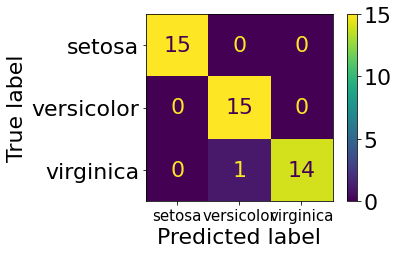

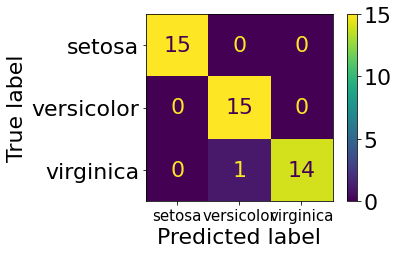

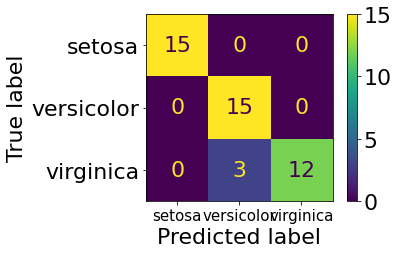

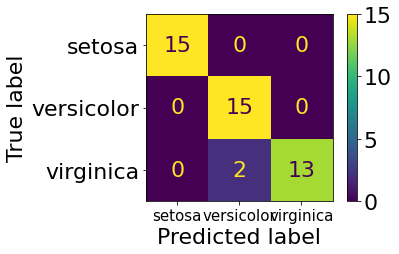

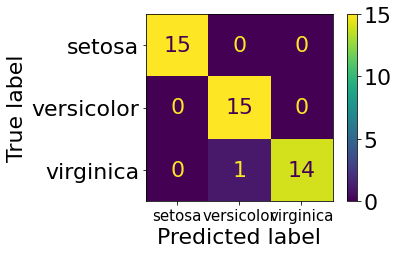

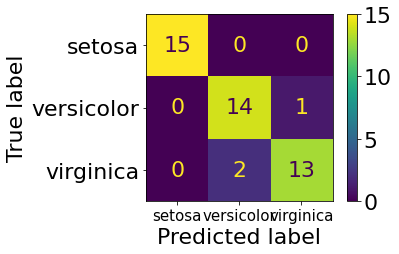

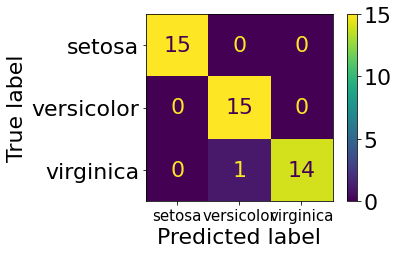

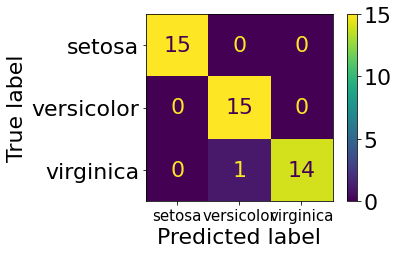

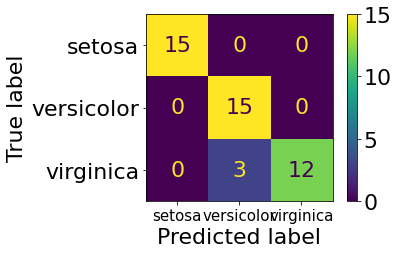

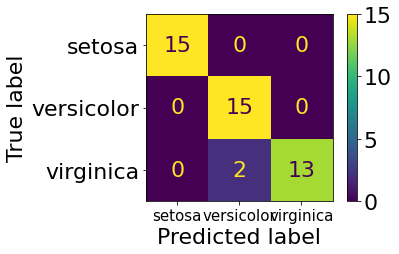

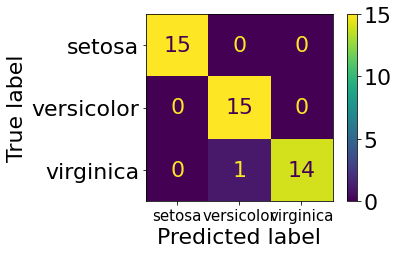

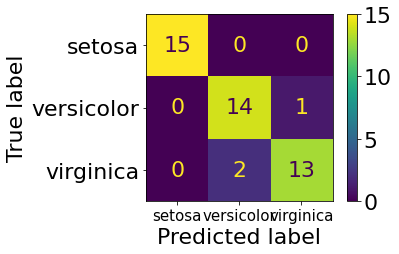

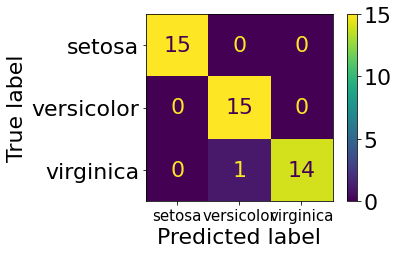

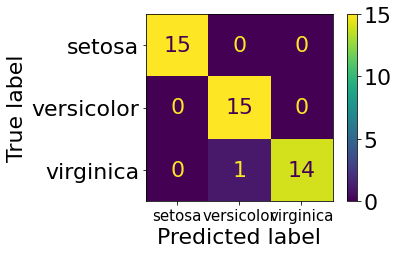

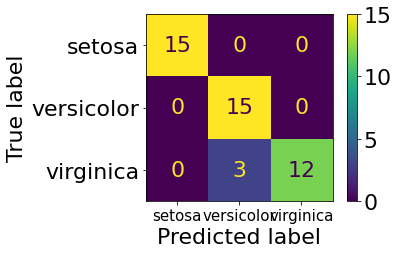

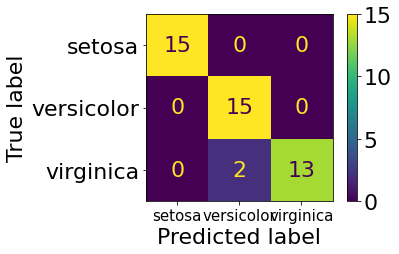

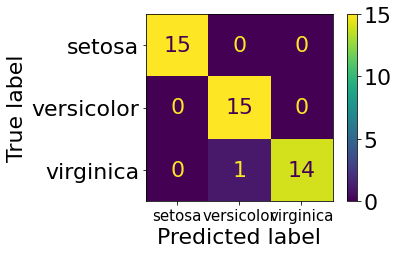

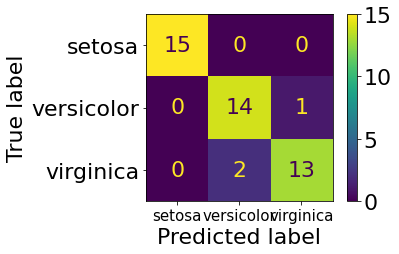

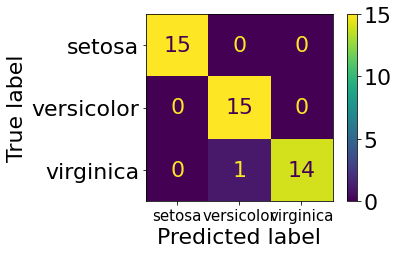

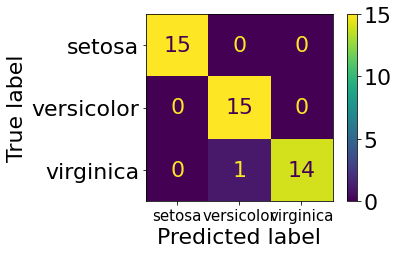

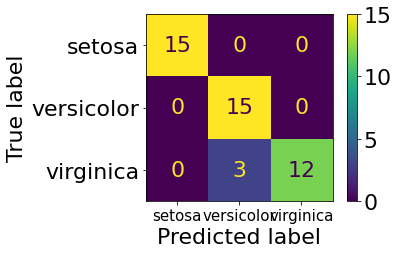

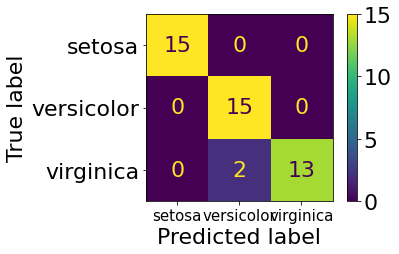

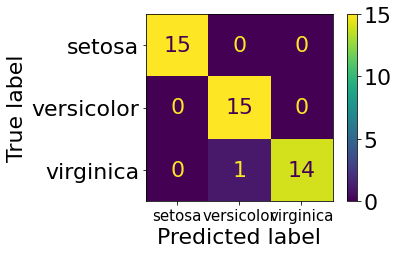

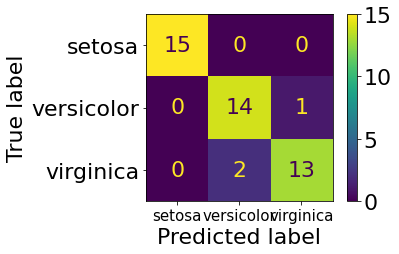

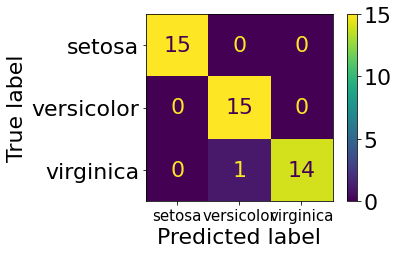

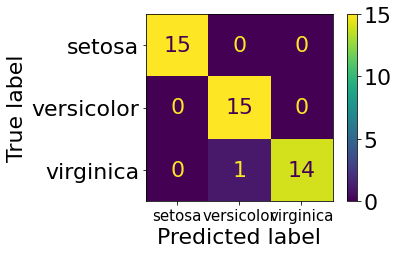

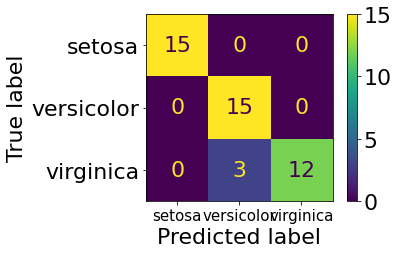

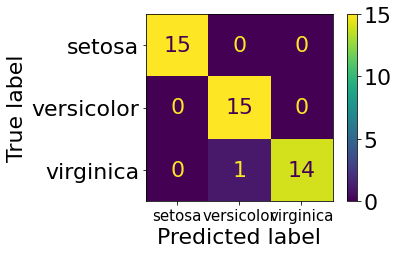

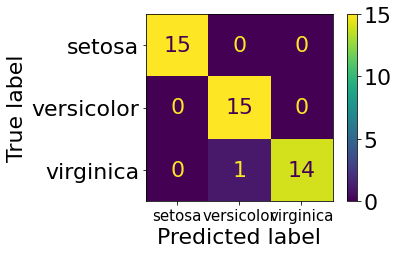

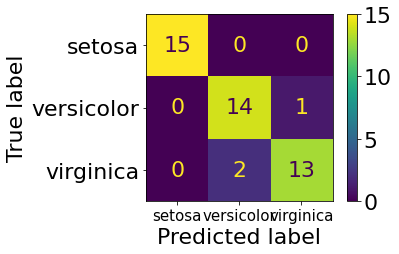

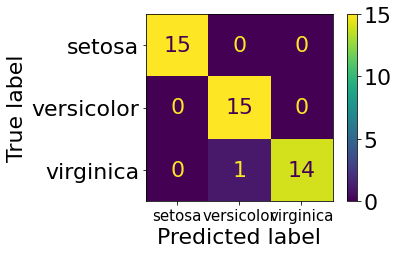

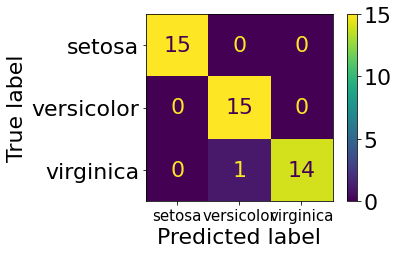

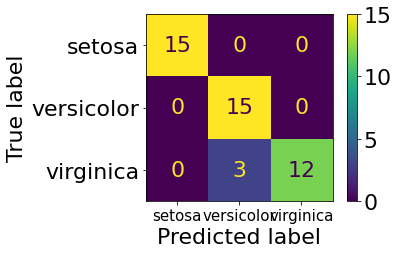

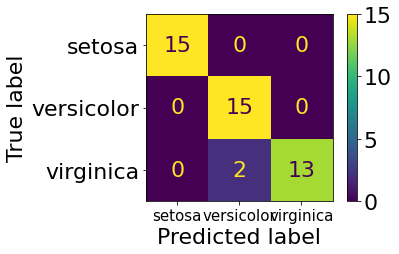

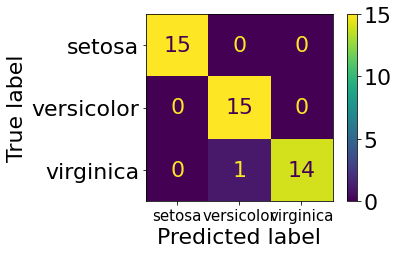

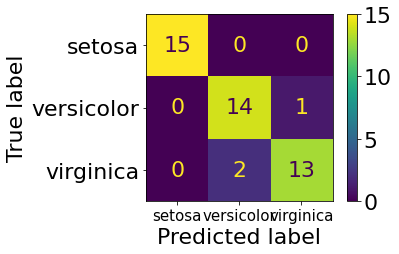

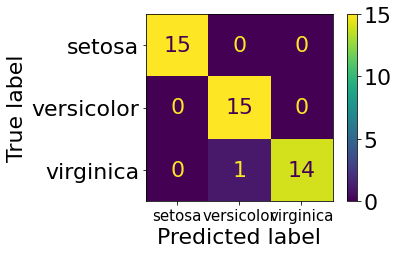

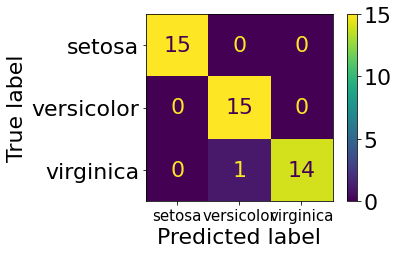

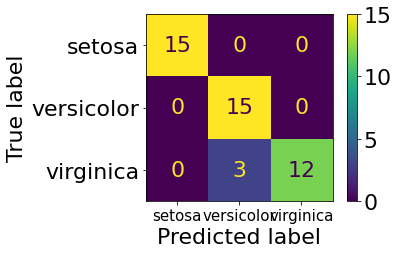

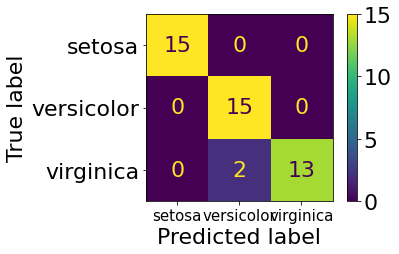

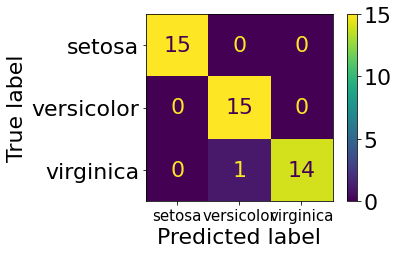

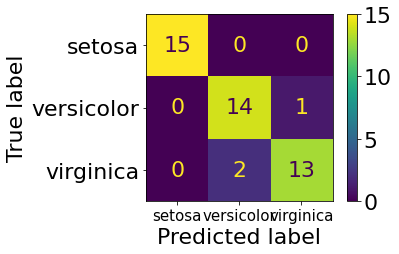

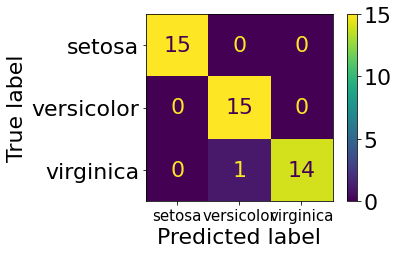

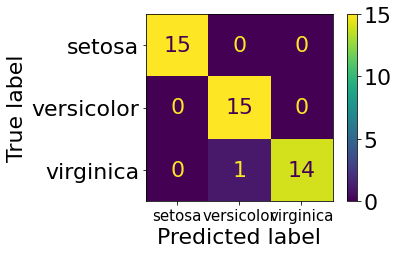

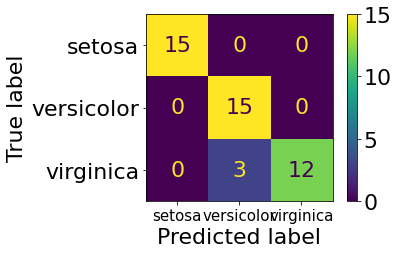

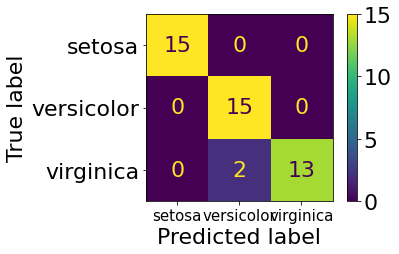

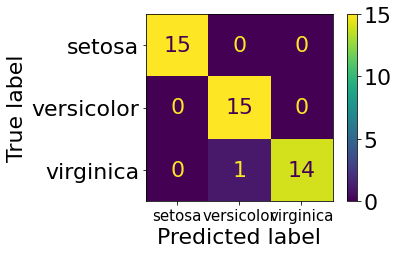

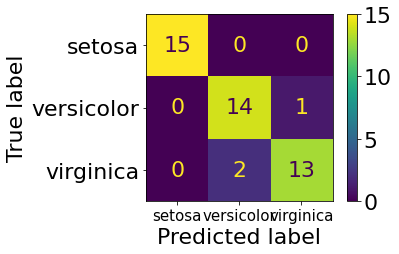

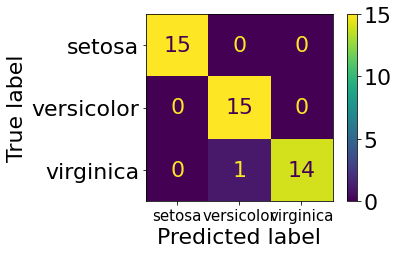

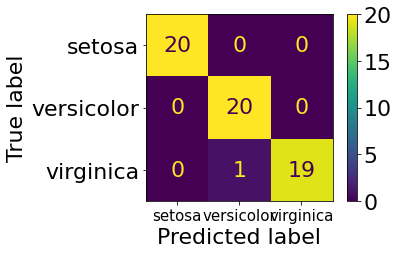

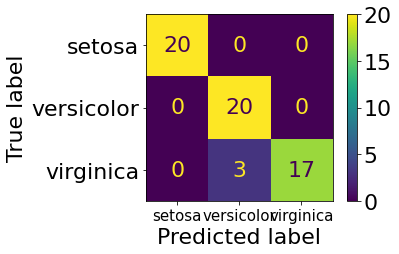

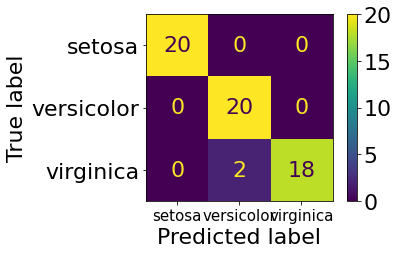

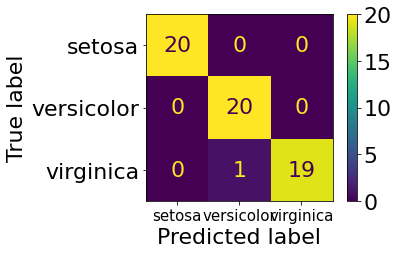

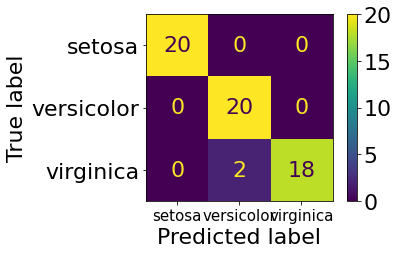

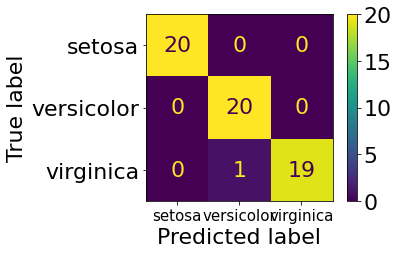

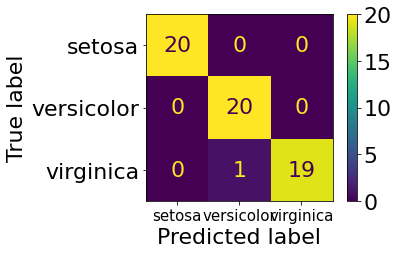

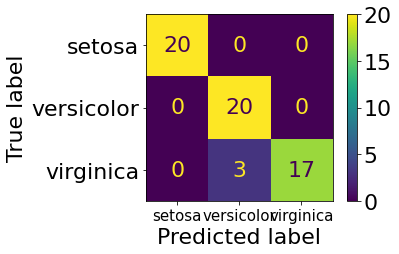

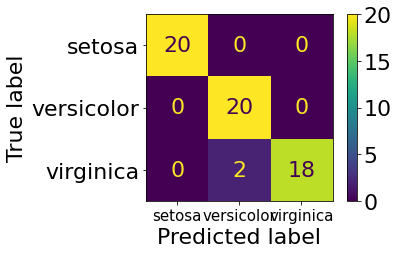

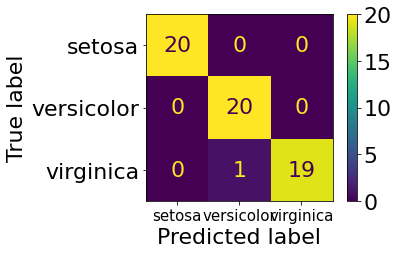

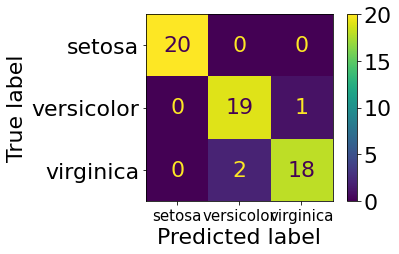

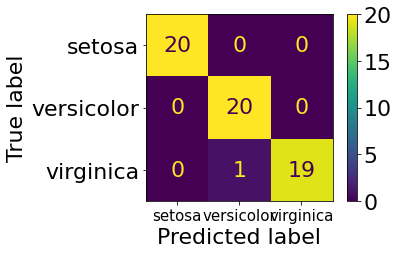

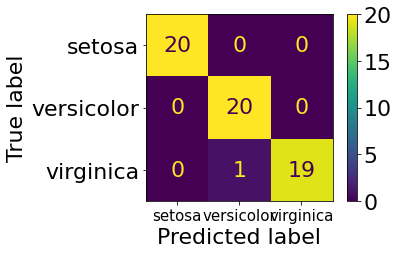

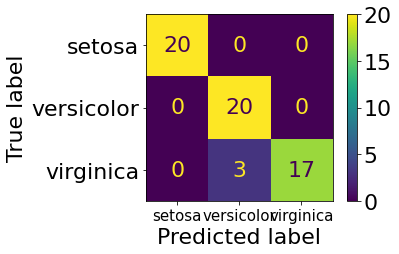

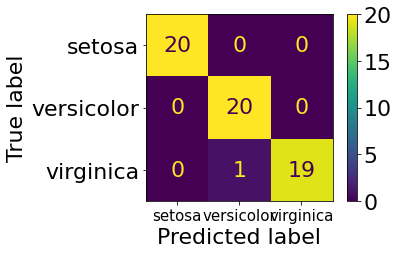

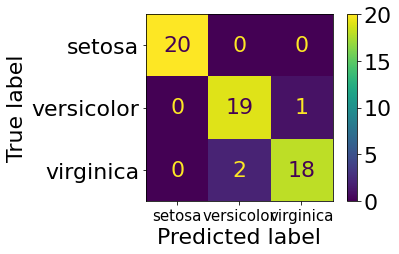

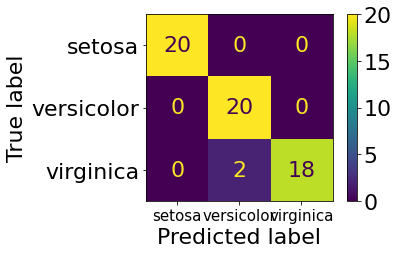

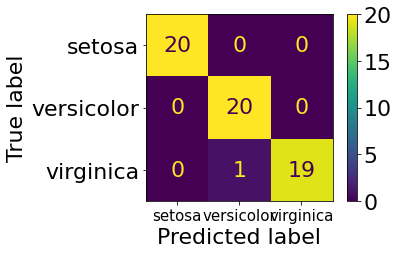

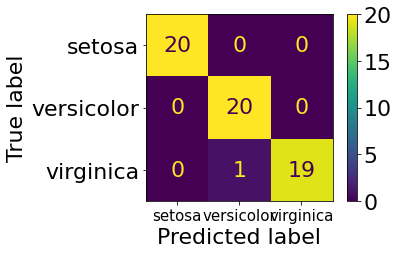

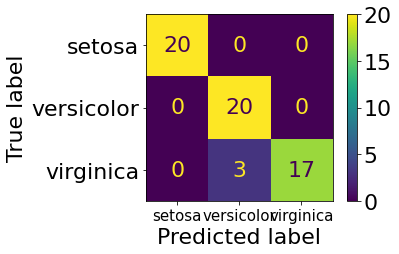

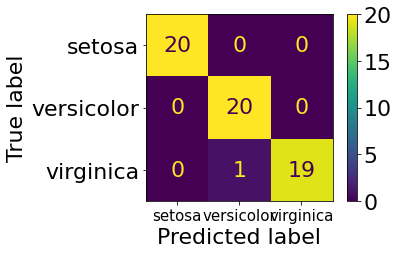

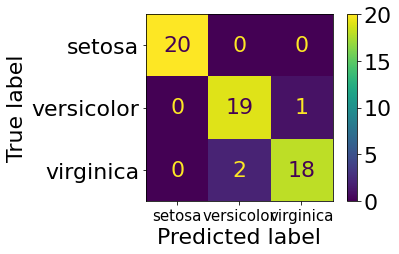

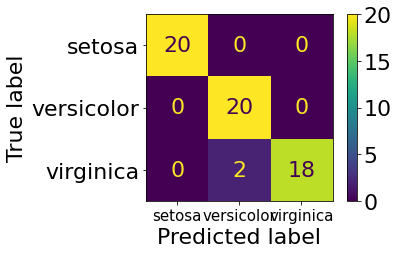

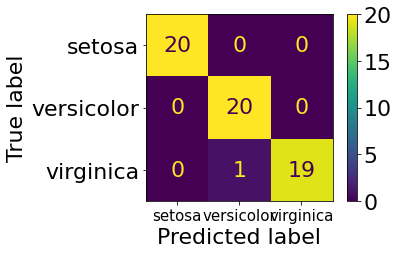

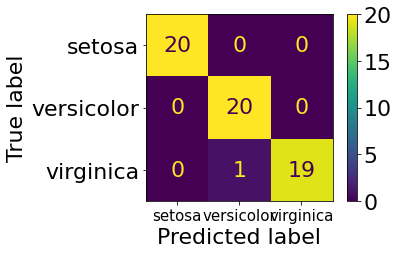

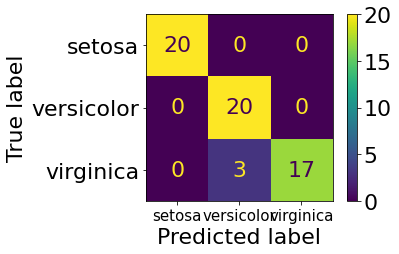

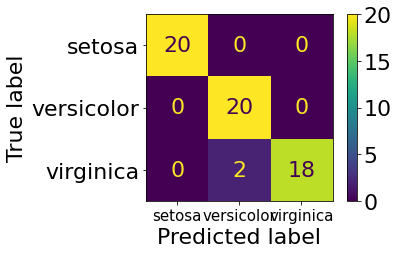

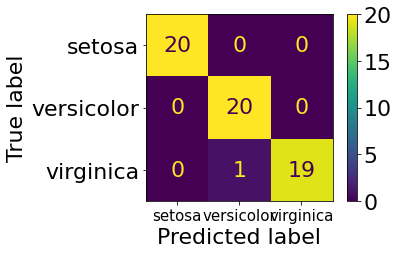

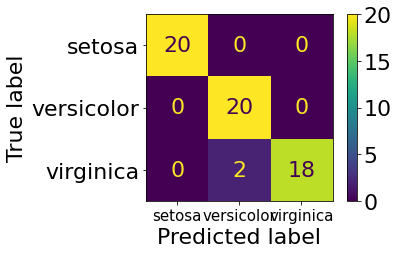

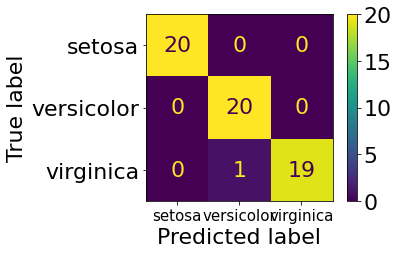

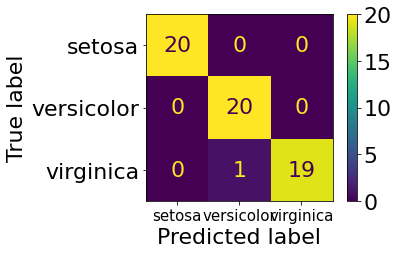

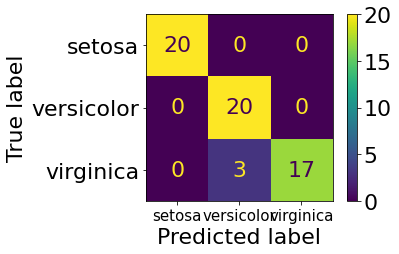

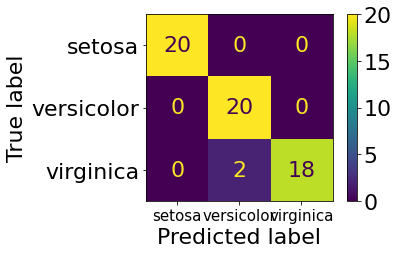

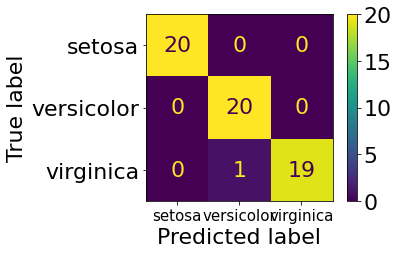

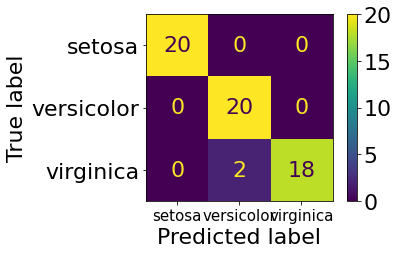

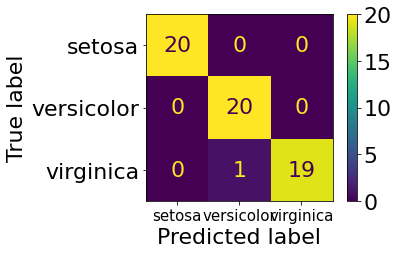

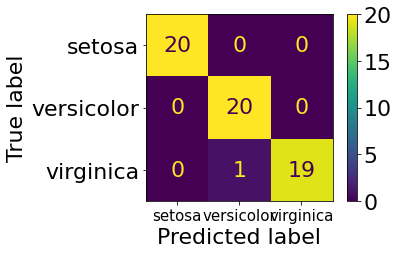

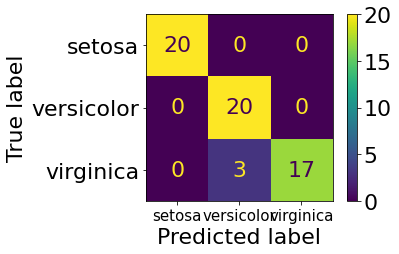

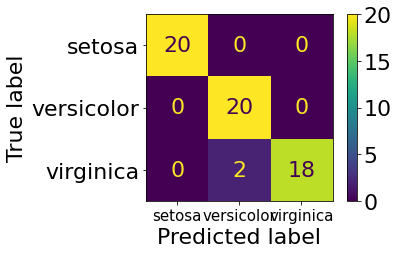

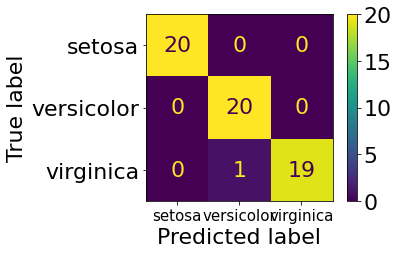

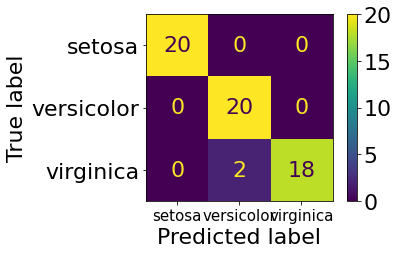

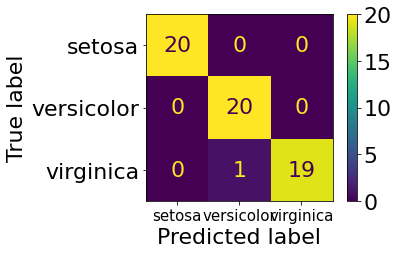

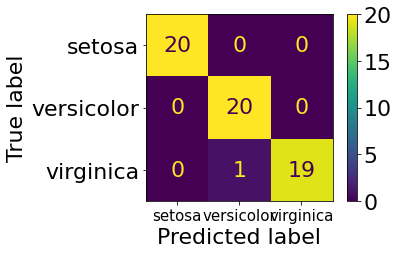

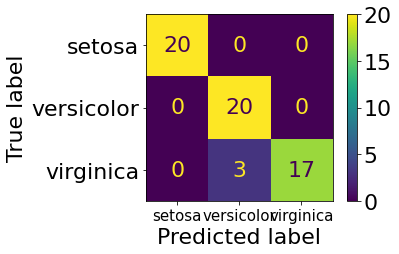

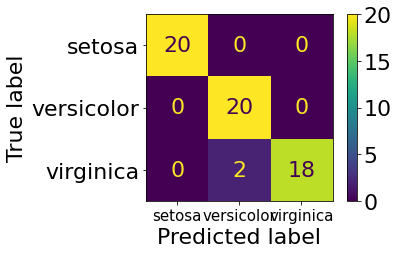

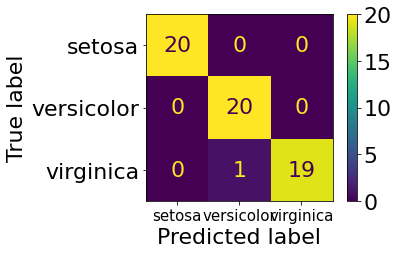

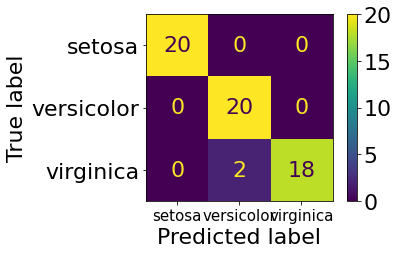

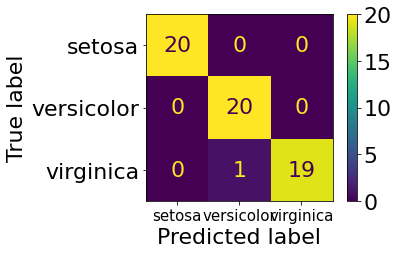

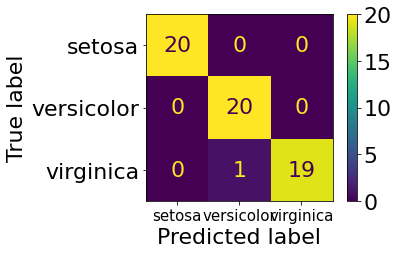

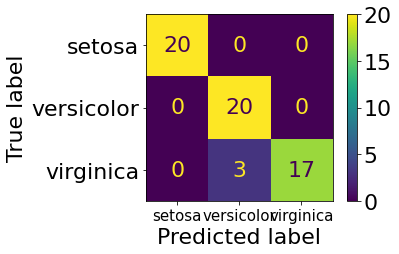

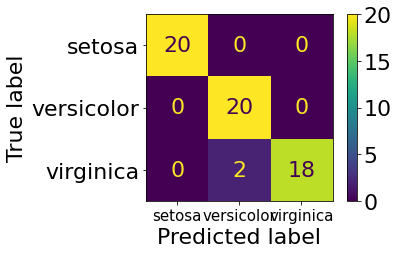

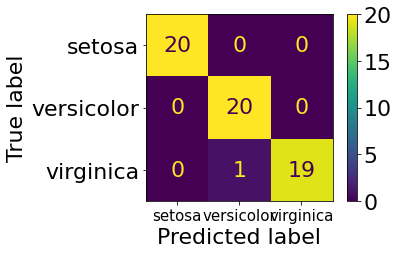

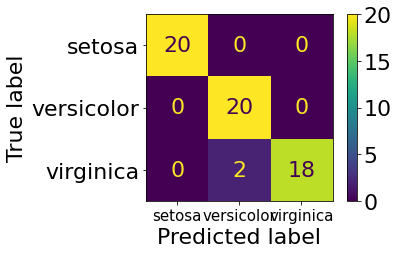

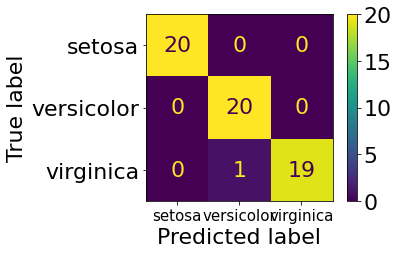

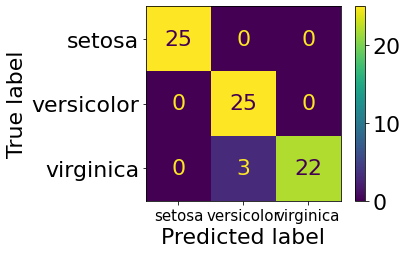

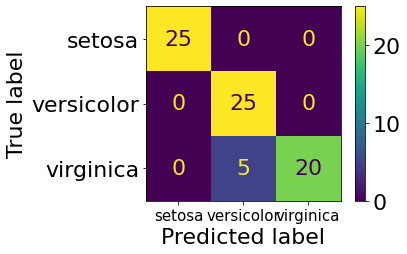

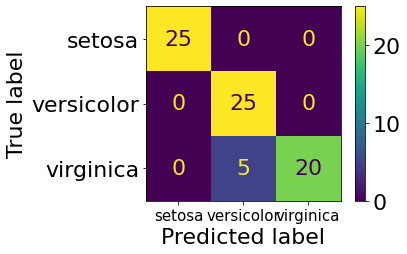

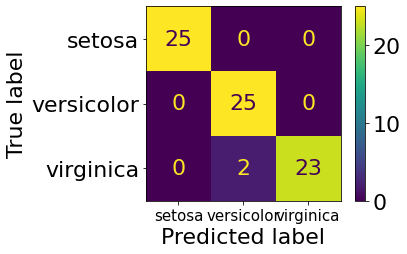

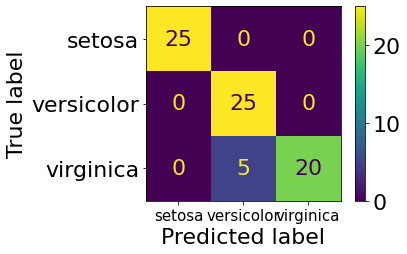

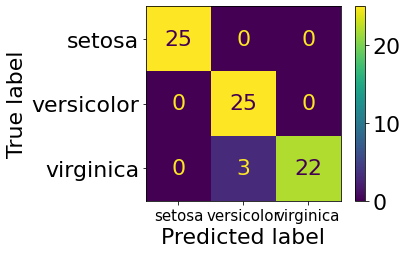

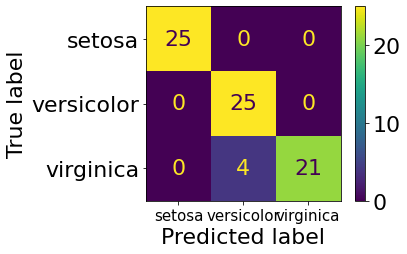

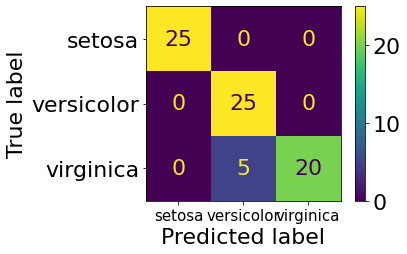

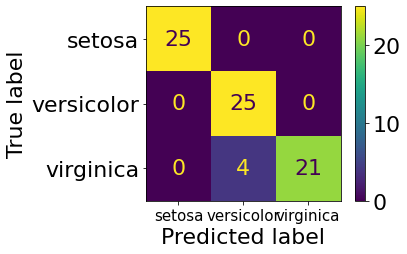

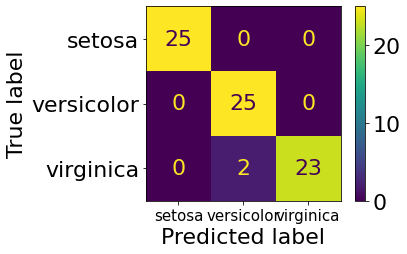

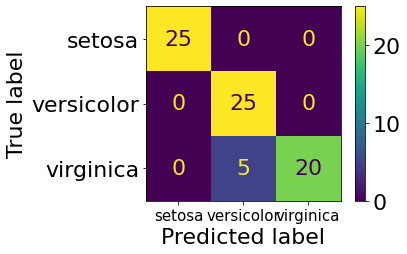

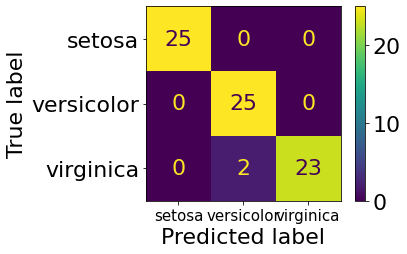

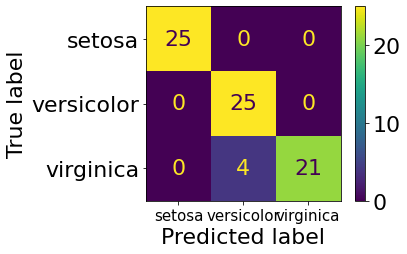

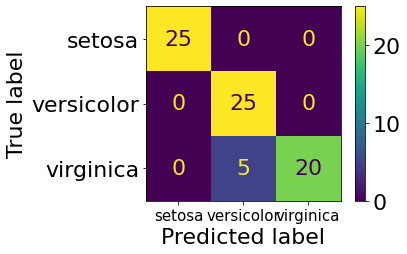

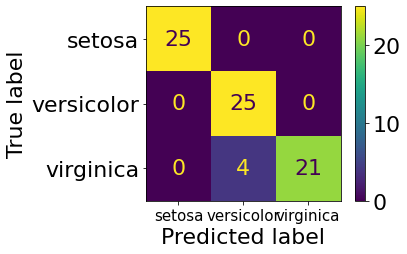

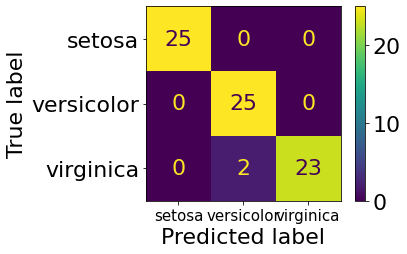

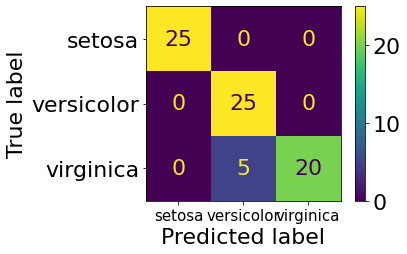

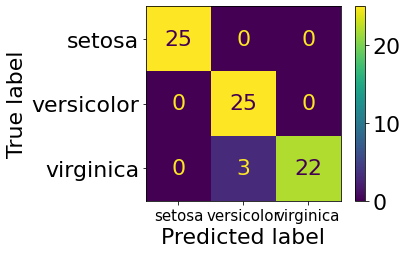

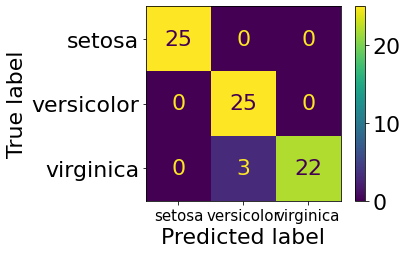

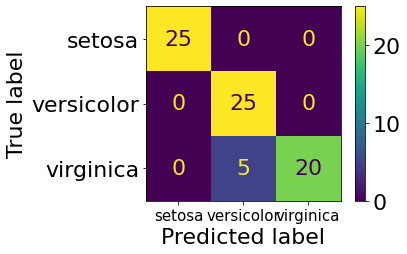

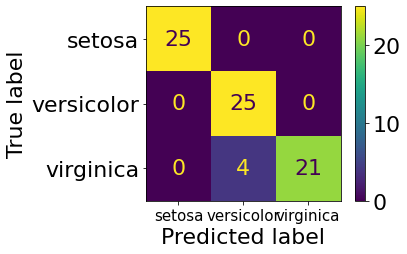

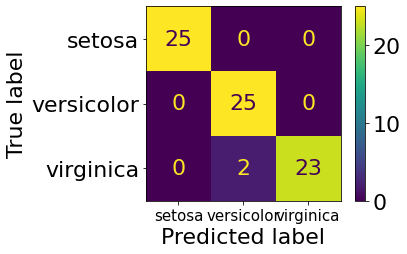

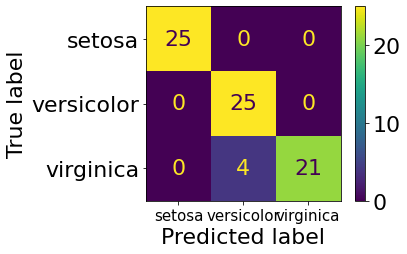

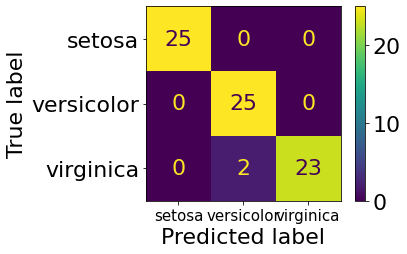

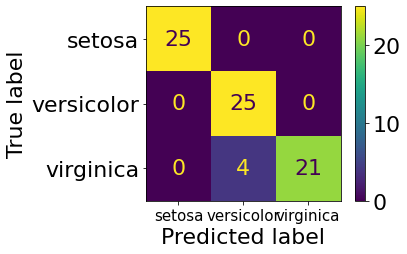

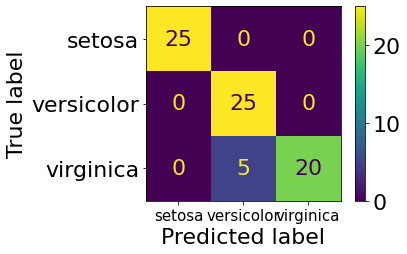

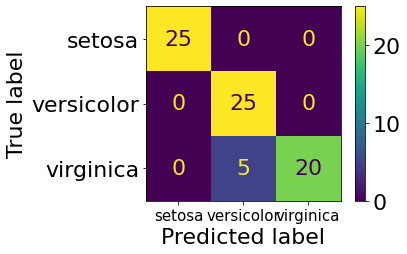

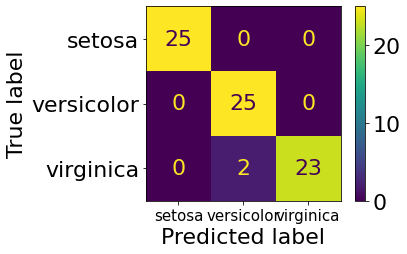

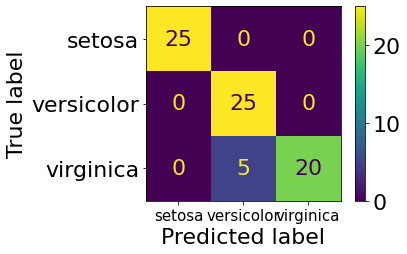

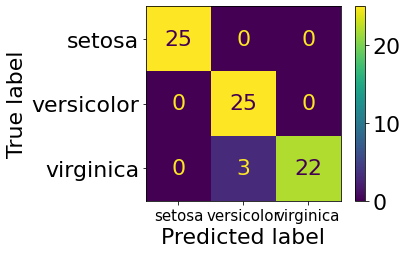

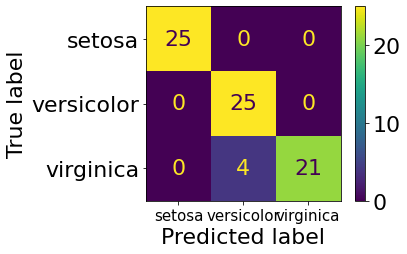

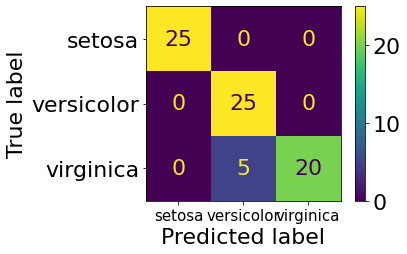

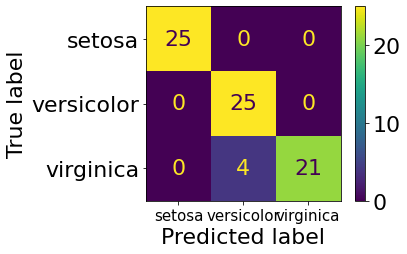

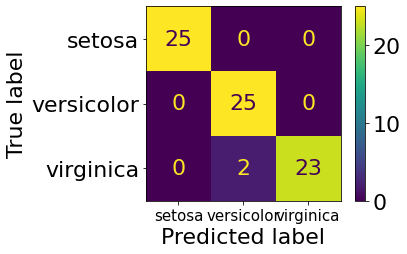

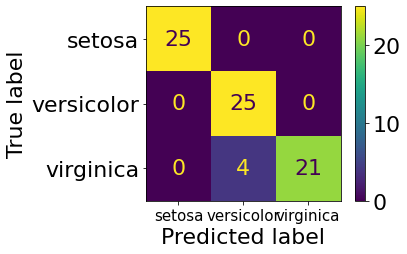

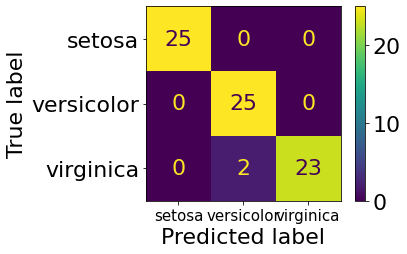

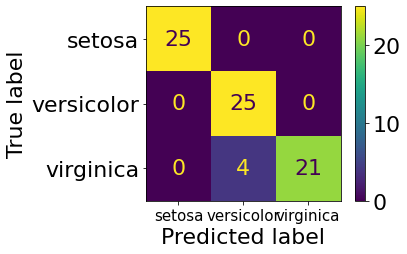

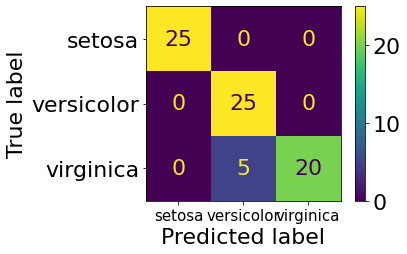

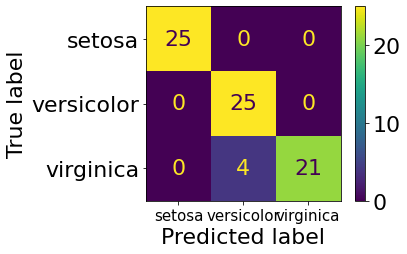

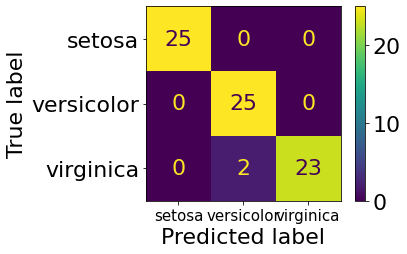

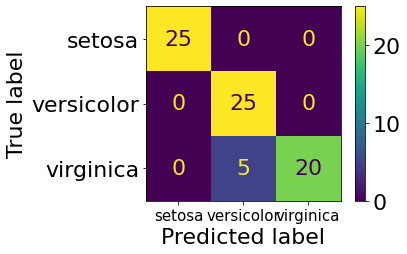

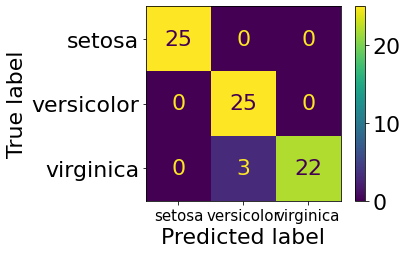

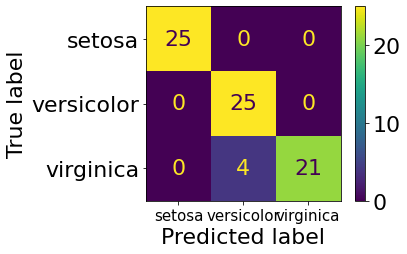

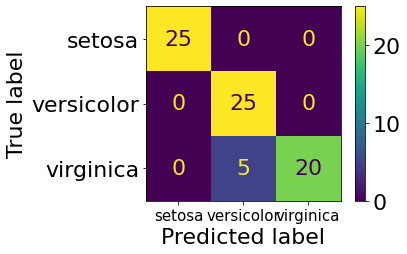

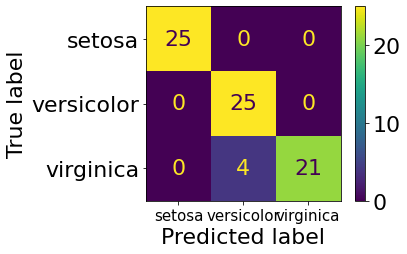

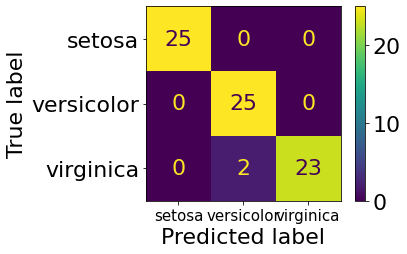

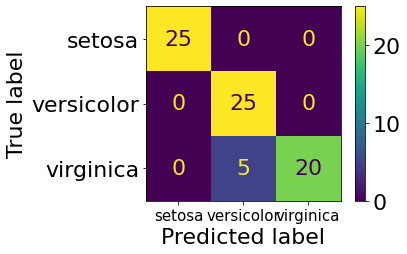

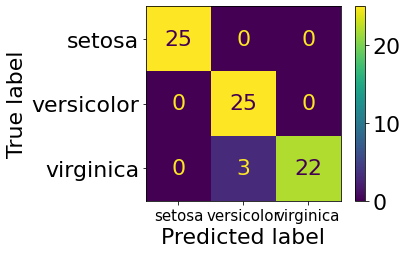

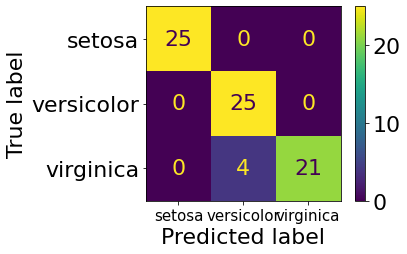

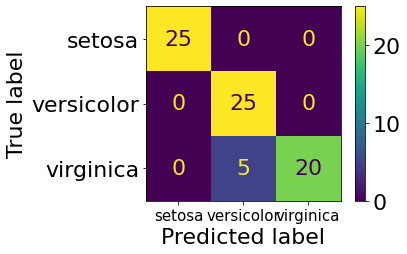

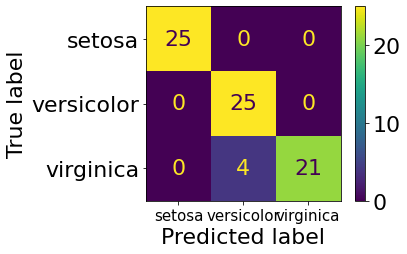

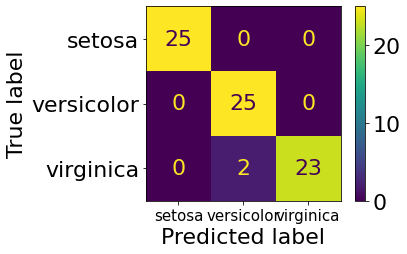

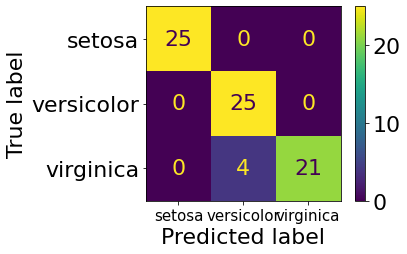

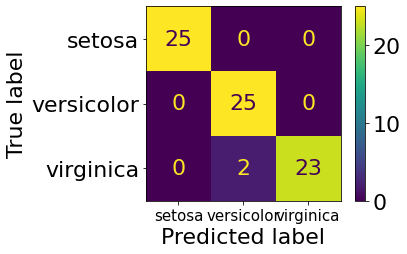

In [192]:
initialPercentageOfTest = 0.2
finalPercentageOfTest = 0.5
maxNumberOfFolds = 10
results = generarResultados(iris_df, initialPercentageOfTest, finalPercentageOfTest, maxNumberOfFolds);
#generarResultados(crazyFlowers_df, initialPercentageOfTest, finalPercentageOfTest, maxNumberOfFolds);

In [38]:
especies = {0: "setosa", 1: "versicolor", 2: "virginica"}

In [39]:
# predicción de la clase de pertenencia
softmax_reg.predict([[5, 3, 2, 1]])
# pb de pertenencia a cada clase
softmax_reg.predict_proba([[5, 3, 2, 1]])

array([[9.55166185e-01, 4.48338142e-02, 8.50530883e-10]])

In [40]:
# predicción de la clase de pertenencia
print("Prueba de prediccion para un iris \n con sépalo de largo 5 y ancho 3 \n y con pétalo de largo 2 y ancho 1\n")
print("Predice:"+softmax_reg.predict([[5, 3, 2, 1]])[0]+'\n')
# pb de pertenencia a cada clase
print("Con probabilidad para cada clase:")
print(softmax_reg_withElastic.predict_proba([[5, 3, 2, 1]]))
print("----------------------------")
print("\nUsando penalidad ElasticNet predice:"+softmax_reg_withElastic.predict([[5, 3, 2, 1]])[0]+'\n')
# pb de pertenencia a cada clase
print("Con probabilidad para cada clase:")
print(softmax_reg_withElastic.predict_proba([[5, 3, 2, 1]]))
print("----------------------------")
print("\nSin usar sepal width predice:"+reg_withoutSepalWidth.predict([[5, 2, 1]])[0]+'\n')
# pb de pertenencia a cada clase
print("Con probabilidad para cada clase:")
print(reg_withoutSepalWidth.predict_proba([[5, 2, 1]]))
print("----------------------------")
print("\nSin usar sepal width con penalidad ElasticNet predice:"+reg_withElastic_withoutSepalWidth.predict([[5, 2, 1]])[0]+'\n')
# pb de pertenencia a cada clase
print("Con probabilidad para cada clase:")
print(reg_withElastic_withoutSepalWidth.predict_proba([[5, 2, 1]]))

Prueba de prediccion para un iris 
 con sépalo de largo 5 y ancho 3 
 y con pétalo de largo 2 y ancho 1

Predice:setosa

Con probabilidad para cada clase:
[[9.60586055e-01 3.94139448e-02 2.53144473e-10]]
----------------------------

Usando penalidad ElasticNet predice:setosa

Con probabilidad para cada clase:
[[9.60586055e-01 3.94139448e-02 2.53144473e-10]]
----------------------------

Sin usar sepal width predice:setosa

Con probabilidad para cada clase:
[[8.94294559e-01 1.05705394e-01 4.73999664e-08]]
----------------------------

Sin usar sepal width con penalidad ElasticNet predice:setosa

Con probabilidad para cada clase:
[[9.18324246e-01 8.16757491e-02 4.47321033e-09]]
